In [1]:
# Packages installation
!pip install xmltodict
!pip install ktrain
!pip install gensim
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=89edf7f74308fe22007aae1d3a27e50c9f299289ff7910939827575064863490
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=k

In [43]:
# import libraries
import urllib # For making API call
import xmltodict as xtd
import ktrain
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS as stopwordss

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Get English stopwords
english_stopwords = set(stopwords.words('english'))

# Function to remove stopwords from a string
def remove_stopwords(string):
    # Tokenize the string
    words = word_tokenize(string)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in english_stopwords]
    # Join the filtered words back into a string
    filtered_string = ' '.join(filtered_words)
    return filtered_string


stemmer = SnowballStemmer('english')

def stem(text):
  return stemmer.stem(text)


def preprocess(text):
  result = []
  for token in simple_preprocess(text, min_len = 4):
    if token not in stopwordss:
      result.append(stem(token))

  return result

In [70]:
keyWords = input("Please provide your search terms or key words: ")
searchTerm = '+'.join(keyWords.replace(',', ' ').split())

print('searchTerm: ', searchTerm)

Please provide your search terms or key words: Data analytics in diabetes management
searchTerm:  Data+analytics+in+diabetes+management


In [71]:
# Get dataset
url = 'http://export.arxiv.org/api/query?search_query=all:'+searchTerm+'&start=0&max_results=1000'
data = urllib.request.urlopen(url)

papers_in_xml = data.read().decode('utf-8')
papers_in_xml

Output hidden; open in https://colab.research.google.com to view.

In [74]:
# Preporcess data - Convert dataset from XML to dictionary data type for easy processing
papers_in_dict = xtd.parse(papers_in_xml)
papers = papers_in_dict['feed']['entry']
print(papers)

# Preporcess data - Format data to include only ID, title, and summary
mainPapers = [];
for paper in papers:
  id = paper['id'],
  title = paper['title'],
  summary = paper['summary']
  mainPapers.append({"id": id[0], "title": title[0], "summary": summary, "text": title[0]+" \n "+summary})


# Show the number of datasets fetched based on user keywords.
print('Total dataset: %s'% len(mainPapers));

In [75]:
# Preporcess data - build up the list of texts to be fed to the recommender model
texts = [ paper['text'] for paper in mainPapers ]

print(texts[0])

DiaTrend: A dataset from advanced diabetes technology to enable
  development of novel analytic solutions 
 Objective digital data is scarce yet needed in many domains to enable
research that can transform the standard of healthcare. While data from
consumer-grade wearables and smartphones is more accessible, there is critical
need for similar data from clinical-grade devices used by patients with a
diagnosed condition. The prevalence of wearable medical devices in the diabetes
domain sets the stage for unique research and development within this field and
beyond. However, the scarcity of open-source datasets presents a major barrier
to progress. To facilitate broader research on diabetes-relevant problems and
accelerate development of robust computational solutions, we provide the
DiaTrend dataset. The DiaTrend dataset is composed of intensive longitudinal
data from wearable medical devices, including a total of 27,561 days of
continuous glucose monitor data and 8,220 days of insulin 

In [76]:
# Fit a topic model to documents in <texts>.
# The get_topic_model function learns a topic model using Latent Dirichlet Allocation (LDA).
%%time
tm = ktrain.text.get_topic_model(texts=texts, model_type='lda', n_topics=100, n_features=10000, min_df=2,
                                 max_df=0.8, stop_words='english', max_iter=10, lda_max_iter=None,
                                 lda_mode='online', token_pattern=None, verbose=1
                                 )

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
done.
CPU times: user 15 s, sys: 11 s, total: 25.9 s
Wall time: 15.4 s


In [77]:
# Show generated topics to get a feel for what kinds of subjects
# are discussed within this dataset.
tm.print_topics()

topic 0 | encountered empowerment priorities profiling reasoning result perform optimizing counts hotspots
topic 1 | patients identification model robust patient t2d diabetes used disease individualized
topic 2 | glucose blood insulin cgm model ogtt diabetes continuous patients prediction
topic 3 | gracefully impacts instruments reflect incomplete shared demonstration novel demanding typically
topic 4 | unreliable unfortunately glucose-insulin characterizations accuracy modalities endanger motivation continuously extent
topic 5 | serve allowed layered intelligent safe retail elaborate home sparked complete
topic 6 | analytics big management cloud challenges computing research platform applications iot
topic 7 | diabetes diabetic cases air disease significant concentration population used pollution
topic 8 | rehabilitation fitness exercise lipids factors patients diabetes model diabetic risk
topic 9 | ppg photoplethysmography invasive xgboost minimally signal diabetes continuous non-inv

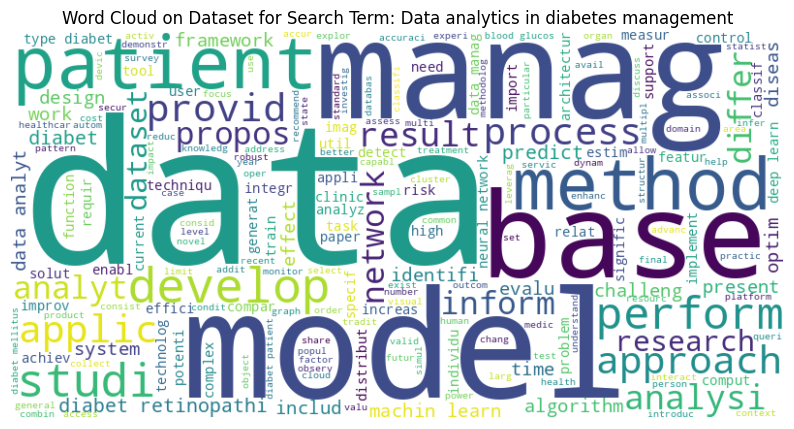

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

filtered_texts = [', '.join(preprocess(text)) for text in texts]

# Generate word cloud for the entire corpus
text = ' '.join(filtered_texts)  # Combine all filtered strings into a single text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud on Dataset for Search Term: ' + keyWords)
plt.axis('off')
plt.show()

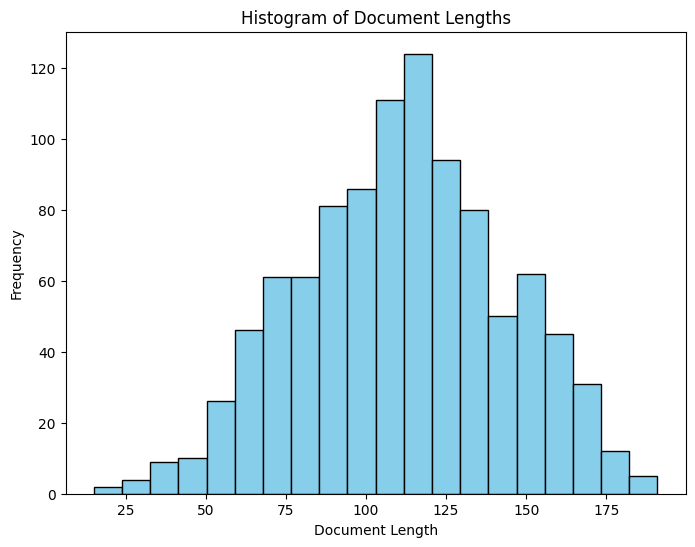

In [79]:
# Plot histogram of document lengths
doc_lengths = [len(string.split()) for string in filtered_texts]
plt.figure(figsize=(8, 6))
plt.hist(doc_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()

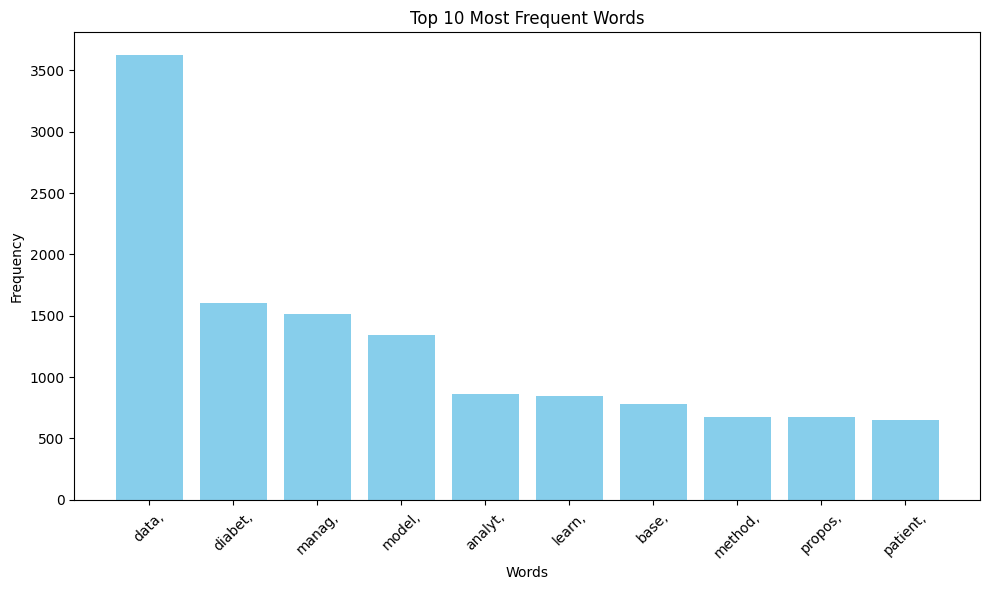

In [80]:
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize each document and flatten the list of tokens
tokens = [word.lower() for text in filtered_texts for word in text.split()]

# Calculate word frequencies
word_freq = Counter(tokens)

# Sort the word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Extract the top N most frequent words and their frequencies
top_n = 10
top_words = list(sorted_word_freq.keys())[:top_n]
top_freqs = list(sorted_word_freq.values())[:top_n]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_freqs, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [81]:
# The build fnx uses Latent Dirichlet Allocation (LDA) to analyze the input documents and determine their topic distributions.
# For each document in texts, the function computes the probability distribution over topics.
# It also filters out documents whose highest topic probability is below the set threshold.
tm.build(texts, threshold=0.3)

done.


In [82]:
# This is useful to ensure all data and metadata are aligned with the same array indices in case
# we want to use them later (e.g., in visualizations, for example).
texts = tm.filter(texts)

In [83]:
# Show topics with words that make up the topic and the number of documents with that topic as primary.
tm.print_topics(show_counts=True)


topic:54 | count:711 | management diabetes model using learning models analysis approach information paper
topic:58 | count:159 | diabetic retinopathy learning images classification deep detection using image diagnosis
topic:6 | count:100 | analytics big management cloud challenges computing research platform applications iot
topic:74 | count:6 | social media disaster obesity public health diabetes tweets food twitter
topic:21 | count:6 | water mice gamma nod offloading curation diabetes constrained agile development
topic:2 | count:5 | glucose blood insulin cgm model ogtt diabetes continuous patients prediction
topic:14 | count:3 | diabetes driver drivers sleep stopping safety stop hypoglycemia unsafe t1dm
topic:80 | count:3 | genes genetic mellitus t2dm pathophysiology diabetes gdm review mody type
topic:91 | count:3 | couples partners cooperative life daily partner emotions members well-being emotional
topic:26 | count:1 | experts comments correctness guidelines compared compliance 

In [84]:
# Visualizing the corpus
tm.visualize_documents(doc_topics=tm.get_doctopics())


In [85]:
# Train the model
tm.train_recommender()


In [86]:
# Extract search terms
search_terms = keyWords.lower().split()

# Remove stopwords from Search Terms
filtered_searchTerms = [remove_stopwords(word) for word in search_terms]

import re

def remove_punctuations_and_special_chars(text):
    # Define a regular expression to keep only alphanumeric characters and spaces
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Strip leading and trailing whitespace
    cleaned_text = cleaned_text.strip()
    return cleaned_text

# Apply the cleaning function to each string in the array
cleaned_ = [remove_punctuations_and_special_chars(text) for text in filtered_searchTerms]

# Remove empty strings and strings with only whitespace
cleaned_filtered_searchTerms = [text for text in cleaned_ if text]  # This ensures no empty strings


# Calculate the minimum number of key terms required for relevance
min_key_terms_required = int(0.5 * len(cleaned_filtered_searchTerms))

# Determine relevant documents based on search terms in titles
relevant_documents = []

for paper in mainPapers:
    title_lower = paper['text'].lower()
    # Count the number of key terms present in the title
    key_terms_in_title = sum(1 for term in cleaned_filtered_searchTerms if term in title_lower)
    # Calculate relevance score based on the percentage of key terms present in the title
    relevance_score = key_terms_in_title / len(cleaned_filtered_searchTerms)
    # Check if the paper has at least 40% of the key terms
    if key_terms_in_title >= min_key_terms_required:
        paper['relevance_score'] = relevance_score  # Assign relevance score to the document
        relevant_documents.append(paper)

# Sort relevant_documents based on relevance score
relevant_documents.sort(key=lambda x: x['relevance_score'], reverse=True)

print(filtered_searchTerms)
print(cleaned_filtered_searchTerms)
print(len(relevant_documents))

['food', 'security', 'agricultural', 'sustainability']
947


In [68]:
# Make recommendation
n_neighbor = 100 if len(mainPapers) > 100 else len(mainPapers) - 10
recommended_documents = []

# Sort relevant_documents based on relevance score
relevant_documents.sort(key=lambda x: x['relevance_score'], reverse=True)

# relevant_documents[:5]
count = 0  # Initialize a count variable to keep track of the number of recommendations appended
for i, doc in enumerate(tm.recommend(text=keyWords, n=len(relevant_documents) + 5, n_neighbors=n_neighbor), start=1):
    for p in mainPapers:  # Only consider relevant documents for recommendations
        if p['text'] == doc['text']:
            recommended_documents.append(p)

count = 0  # Initialize a count variable to keep track of the number of recommendations appended
for i, doc in enumerate(tm.recommend(text=keyWords, n=len(relevant_documents) + 5, n_neighbors=n_neighbor), start=1):
    for p in relevant_documents:  # Only consider relevant documents for recommendations
        if p['text'] == doc['text']:
            print('Recommendation #%s' % i)
            print('Access Link:\t%s' % p['id'])
            # print('Relevance Score:\t%s' % p['relevance_score'])  # Print relevance score
            print('Title:\t%s' % p['title'])
            print('Summary:\t%s' % p['summary'])
            print()
            count += 1
            if count >= 5:  # Break out of the loop after appending the top 5 recommendations
                break
    if count >= 5:  # Break out of the outer loop as well if the top 5 recommendations are found
        break

Recommendation #1
Access Link:	http://arxiv.org/abs/2209.07215v1
Title:	ProAPT: Projection of APT Threats with Deep Reinforcement Learning
Summary:	The highest level in the Endsley situation awareness model is called
projection when the status of elements in the environment in the near future is
predicted. In cybersecurity situation awareness, the projection for an Advanced
Persistent Threat (APT) requires predicting the next step of the APT. The
threats are constantly changing and becoming more complex. As supervised and
unsupervised learning methods require APT datasets for projecting the next step
of APTs, they are unable to identify unknown APT threats. In reinforcement
learning methods, the agent interacts with the environment, and so it might
project the next step of known and unknown APTs. So far, reinforcement learning
has not been used to project the next step for APTs. In reinforcement learning,
the agent uses the previous states and actions to approximate the best action
of 

In [69]:

# Evaluate the system
relevant_set = set([doc['id'] for doc in relevant_documents])
recommended_set = set([doc['id'] for doc in recommended_documents])


true_positives = len(relevant_set.intersection(recommended_set))
false_positives = len(recommended_set - relevant_set)
false_negatives = len(relevant_set - recommended_set)
total_documents = len(relevant_set) + len(recommended_set)
true_negatives = total_documents - (true_positives + false_positives + false_negatives)

# Calculate precision, recall, and F1-score
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision > 0 or recall > 0) else 0
accuracy = (true_positives + true_negatives) / total_documents

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Precision: 0.7471098265895953
Recall: 0.75254730713246
F1-score: 0.7498187092095723
